<a href="https://colab.research.google.com/github/Raghuramas94/PROJECT-1/blob/master/Raghuram_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing KERAS

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing the necessary libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras import optimizers

from keras.datasets import mnist

downloading the data from MNIST to train and test splits

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Plotting the data from MNIST

(60000, 28, 28)


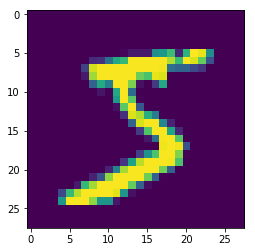

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Normalizing the input

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Convolution Layer 

In [55]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 13))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


printing the summary of the model

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 10)        330       
_________________________________________________________________
batch_normalization_10 (Batc (None, 13, 13, 10)        40        
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 1, 10)          16910     
__________

defining the optimizer and learning rate

In [0]:
sgd = optimizers.SGD(lr=0.009, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

compiling the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

Model training 

In [59]:
model.fit(X_train, Y_train, batch_size=16, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.1441 - acc: 0.9567
Epoch 2/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0701 - acc: 0.9789
Epoch 3/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0569 - acc: 0.9823
Epoch 4/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0477 - acc: 0.9853
Epoch 5/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0432 - acc: 0.9861
Epoch 6/20
60000/60000 [==============================] - 16s 275us/step - loss: 0.0387 - acc: 0.9877
Epoch 7/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.0371 - acc: 0.9880
Epoch 8/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0333 - acc: 0.9895
Epoch 9/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0307 - acc: 0.9900
Epoch 10/20
60000/60000 [==============================] - 16s 269us/step - loss: 

In [60]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1)

Epoch 1/30
 3200/60000 [>.............................] - ETA: 3s - loss: 0.0150 - acc: 0.9950

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 47us/step - loss: 0.0130 - acc: 0.9960
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0128 - acc: 0.9956
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0120 - acc: 0.9960
Epoch 4/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0118 - acc: 0.9967
Epoch 5/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0118 - acc: 0.9964
Epoch 6/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0108 - acc: 0.9970
Epoch 7/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0116 - acc: 0.9965
Epoch 8/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0109 - acc: 0.9968
Epoch 9/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0103 - acc: 0.9971
Epoch 10/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0108 - acc: 0.9969
Epoch 11/3

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

evaluation on the test set

In [68]:
print(score)

[0.04433951988323533, 0.9881]


In [0]:
y_pred = model.predict(X_test)

In [64]:
print(y_pred[:9])
print(y_test[:9])

[[7.7569576e-14 8.5667028e-14 1.1622468e-10 2.0653497e-08 1.1957143e-18
  4.8502627e-15 2.7368758e-22 1.0000000e+00 3.6436465e-13 2.3989258e-11]
 [8.5790006e-09 2.0449626e-07 9.9999952e-01 1.7358382e-11 1.5627953e-14
  2.0616084e-13 2.5858935e-07 3.7455467e-15 3.3215470e-09 2.9049879e-14]
 [1.8302142e-08 9.9995828e-01 1.0410878e-06 3.0290215e-09 1.4285916e-05
  5.6356829e-08 9.1266630e-09 2.5982827e-05 3.7732605e-07 1.4458669e-09]
 [9.9999309e-01 2.7610047e-16 5.9683298e-06 1.0773515e-11 3.8238610e-13
  1.4062258e-10 9.0538566e-07 1.2879362e-11 5.0702305e-09 4.8220940e-08]
 [4.3759340e-11 6.2441352e-10 2.3398172e-11 1.1742965e-11 9.9999988e-01
  2.1819020e-15 4.6985506e-12 1.3516735e-08 3.7994793e-10 6.1275635e-08]
 [6.8209111e-08 9.9976259e-01 6.4649868e-07 2.6351357e-10 1.8617990e-05
  1.6472035e-09 2.4821711e-10 2.1783241e-04 2.4348594e-07 2.3311046e-09]
 [1.7954901e-14 5.7832952e-09 6.2388059e-09 1.3631566e-11 9.9989891e-01
  3.9885328e-10 4.1559003e-13 1.7032800e-09 1.0054103e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

printing the output and saving the weights

IndexError: ignored

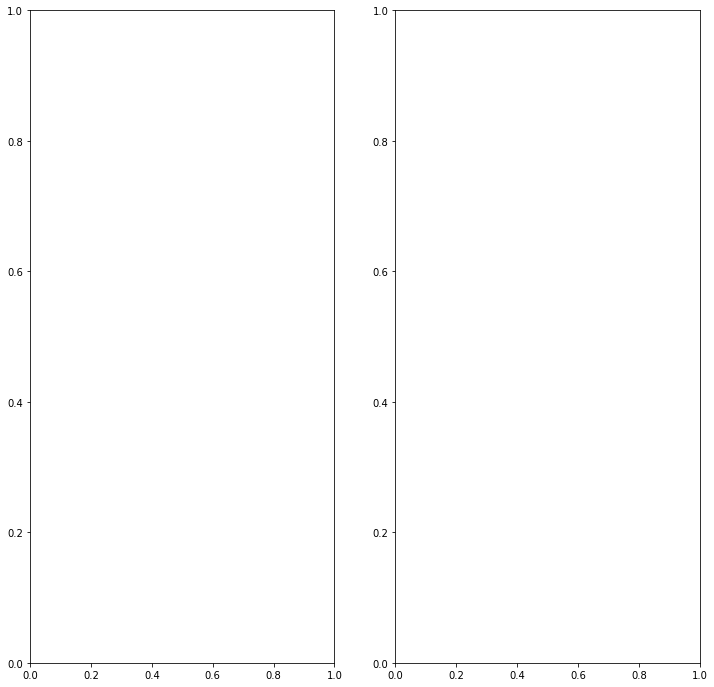

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()